<a href="https://colab.research.google.com/github/yooseungjun/ML/blob/main/2%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**02-1 훈련 세트와 테스트 세트**

 ## **정보** - **지도학습** vs **비지도학습**
  1. **지도학습** - 정답(타깃)을 제공하고 학습시킨다.
     - ex) 도미 or 빙어 => **KNeighborsClassifier는 지도학습**
  2. **비지도학습** - 타깃 없이 입력데이터만 사용한다. 
     - 정답을 사용하지 않아 맞힐수 없다
     - 데이터 파악, 변형에 좋다.


-**지도학습(Supervised Learning)**예시 - 회귀, 분류 등
  - 분류(Classification)
   - kNN
   - Naive Bayes
   - Support Vector
   - Machine Decision
  - 회귀(Regression)
   - Linear Regression
   - Locally Weighted Linear
   - Lasso
   - Ridge


-**비지도학습(Unsupervised Learning)**예시 - 군집, 시각화, 차원축소, 연관분석 등

 - 군집(Clustering)
  - K-평균(k-Means)
  - 계층 군집 분석(HCA, Hierarchical Cluster Analysis)
  - 기댓값 최대화(Expectation Maximization)

 - 시각화(Visualization)와 차원 축소(Dimensionality Reduction)
    - 주성분 분석(PCA, Principal Component Analysis)
    - 커널 PCA(Kernel PCA)
    - 지역적 선형 임베딩(LLE, Locally-Linear Embedding)
    - t-SNE(t-distributed Stochastic Neighbor Embedding)

 - 연관 규칙 학습(Association Rule Learning)
  - 어프라이어리(Apriori)
  - 이클렛(Eclat)

In [ ]:
#도미&빙어 데이터 출처 => bit.ly/bream_smelt
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [ [l,w] for l,w in zip(fish_length,fish_weight) ] #리스트내포 구문(2차원 배열로 들어간다)
fish_target = [1]*35 + [0]*14 #타겟 리스트 만들기 (1==도미 / 0==빙어)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

#fish_data 49개원소 = 35도미 + 14빙어
print(fish_data[0:5]) #0~4까지 5개 원소만 pick
print(fish_data[:5]) #0:5와 같은 표현(0 생략)
print(fish_data[44:]) #44~48까지 5개원소만 pick (44:49와 동일한 표현)

train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]


kn.fit(train_input,train_target)
kn.score(test_input,test_target) #0 나온다
#잘못된 훈련+테스트
#테이터를 섞지않았다
#도미만 학습 => 빙어로 테스트
#샘플링 편향(sampling bias)

import numpy as np
#파이썬 리스트를 넘파이 배열로 바꿔주기
input_arr = np.array(fish_data) 
target_arr = np.array(fish_target)

#(샘플수, 특성수)출력 
print(input_arr.shape) #(49,2)


(49, 2)


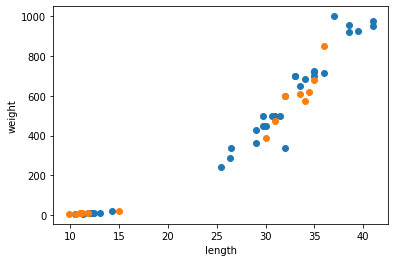

1.0

In [ ]:
import numpy as np
#파이썬 리스트를 넘파이 배열로 바꿔주기
input_arr = np.array(fish_data) 
target_arr = np.array(fish_target)

#(샘플수, 특성수)출력 
print(input_arr.shape) #(49,2)
np.random.seed(42) #일정한 결과 얻기위해 책과 동일하게 42설정
index = np.arange(49) #0부터 48까지 1씩 증가하는 인덱스 만들기
np.random.shuffle(index) #배열을 무작위로 섞는다
# print(index)
# print(input_arr[[1,3]]) # 한번의 여러개 원소를 선택

# 훈련데이터 - 49개 랜덤하게 들어간 index배열 앞 35개를 input_arr에서
train_input = input_arr[index[:35]] # index[0] == 13 //  input_arr[13]== train_input[0]
train_target = target_arr[index[:35]]
#테스트데이터 
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.fit(train_input,train_target)
kn.score(test_input,test_target)

##**정보** - **Numpy List** vs **Python List** 
1. 선언
 * 넘파이 array는 숫자와 문자 섞이면 다 문자로 취급한다.
```
    a = [1, 3, 5, 'a', 'b'] # 1, 3, 5는 숫자형, 'a', 'b'는 문자열
    b = np.array([1, 3, 5, 'a', 'b']) # '1', '3', '5', 'a', 'b'의 문자열로 전환
```
 * 내부 배열내 원소의 개수가 같아야 한다.
```
    a = [[1], [3, 5], [2, 4, 6]] # 문제 X
    b = np.array([[1], [3, 5], [2, 4, 6]]) # 개수가 달라서 array 선언 불가능
    # array([list([1]), list([3, 5]), list([2, 4, 6])], dtype=object)
```
2. 연산
 * 파이썬 리스트는 덧셈 수행시 concatenation수행
```
    # 리스트 연산

    a = [1, 3, 5]
    b = [2, 4, 6]

    a + b # [1, 3, 5, 2, 4, 6]

    # 허용하지 않음 : a - b, a * b, a / b

    a * 3 # [1, 3, 5, 1, 3, 5, 1, 3, 5]
```

  * 넘파이 리스트는 덧셈 수행시 항목간의 덧셈 수행
```
    # 넘파이 어레이 연산

    a = np.array([1, 3, 5])
    b = np.array([2, 4, 6])

    a + b # array([ 3,  7, 11])
    a * b # array([ 2, 12, 30])

    a + 2 # array([3, 5, 7])
    a * 3 # array([ 3,  9, 15])
```
3. 함수
 * 파이썬에서는 함수(리스트), 넘파이에서는 리스트.함수()로 사용가능
```
    a = [1, 3, 5]
    b = np.array([1, 3, 5])

    # 리스트 메소드(b.append(7) 등은 불가능)
    a.append(7)
    a.extend([9])
    a.remove(9)

    # 어레이 메소드(a.mean() 등은 불가능)
    b.mean()
    b.argmax()
    b.round()
```
4. 연산속도
 * 넘파이가 훨씬 빠르다.(10배이상)


#**02-2 데이터 전처리**

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


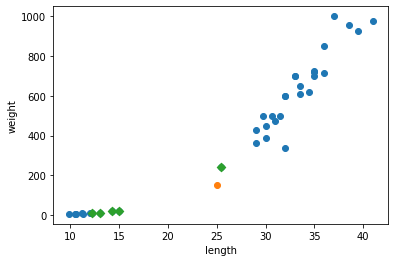

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


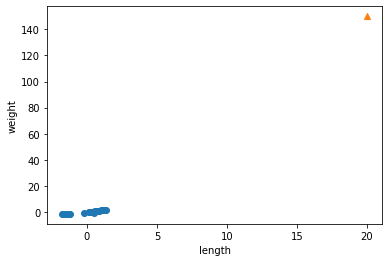

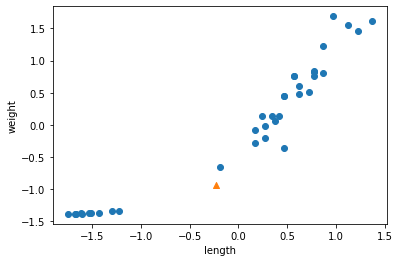

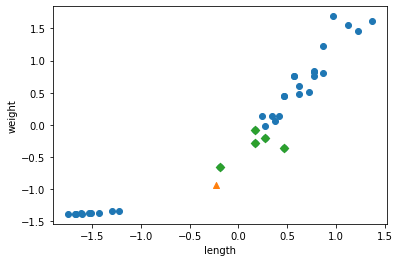

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
import numpy as np
np.column_stack(([1,2,3],[4,5,6])) #column_stack() 전달받은 리스트를 일렬로 세운다음 차례대로 나란히 연결(튜플로 전달)

#데이터 준비하기 - 이전에 사용하던 방법
#fish_data = [ [l,w] for l,w in zip(fish_length,fish_weight) ] #리스트내포 구문(2차원 배열로 들어간다)
#다르게 사용할 방법
fish_data = np.column_stack((fish_length,fish_weight))

#타겟데이터 준비하기 - 이전에 사용하던 방법
#fish_target = [1]*35 + [0]*14 #타겟 리스트 만들기 (1==도미 / 0==빙어)
#다르게 사용할 방법
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

#사이킷런으로 훈련세트와 테스트세트 나누기 - train_test_split()
#fish_data => train_input 
#             test_input
#fish_target => train_target
#               test_target

from sklearn.model_selection import train_test_split
train_input , test_input, train_target, test_target = train_test_split(
    fish_data,fish_target,random_state = 42
)

print(train_input.shape, test_input.shape) # (36,2) (13,2)
print(train_target.shape, test_target.shape) #(36, ) (13, )
print(test_target) # 1 0 0 0 1 1 1 1 1 1 1 1 1 
#(3.3 : 1 ) => (2.5 : 1)원함
#train_test_split()함수 인자중에서 stratify매개변수에 타겟데이터 넣어준다.
train_input, test_input, train_target, test_target = train_test_split(
  fish_data, fish_target, random_state = 42, stratify=fish_target
)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)
kn.predict([[25,150]]) 
#어라라? 도미인데 왜 빙어로 예측하지? => 기준이 달라서
#x축은 단위가 5씩 증가하지만 y축은 단위가 200이다


distance, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='o')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#x거리 y거리 다르다 => 전처리 필요(스케일 맞추자 - 정규분포~)
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)
print(mean,std)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(20,150,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

new = ([25,150]-mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
 
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
 
